# NSRDB and SAM for Solar Power Calculation
---

**NREL**: National Renewable Energy Laboratory

**NSRDB**: National Solar Radiation Database  
Information can be found at https://nsrdb.nrel.gov  
API key Signup: https://developer.nrel.gov/signup/  
API instructions: https://developer.nrel.gov/docs/solar/nsrdb/psm3_data_download/

**SAM**: System Advisor Model  
Information can be found at https://sam.nrel.gov/  
SDK: https://sam.nrel.gov/sdk. The SDK needs to be downloaded.

NSRDB is a serially complete collection of meteorological and solar irradiance data sets for the United States and a growing list of international locations. NSRDB uses a physics-based modeling (PSM: Physical Solar Model) approach to provide solar radiation data for the entire United States in gridded segments (4x4 square kilometer) using geostationary satellites. Data can be accessed via an API.

The [PVWatts v5](https://www.nrel.gov/docs/fy14osti/62641.pdf) model is used to estimate the power output.

In [1]:
from powersimdata.input.grid import Grid
from prereise.gather.solardata.nsrdb import sam, helpers

from getpass import getpass
from matplotlib import pyplot

## 1. Solar plants in Network

In [2]:
grid = Grid(['Western', 'Texas'])
solar_plant = grid.plant.groupby('type').get_group('solar')

--> Loading Western+Texas interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


In [3]:
solar_plant.head()

,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,mu_Qmax,mu_Qmin,GenMWMax,GenMWMin,type,interconnect,lat,lon,zone_id,zone_name
10441,2010760,0.00,0.0,0.0,0.0,1.0400,69.12,0,61.50,13.06,...,0.0,0.0,61.500001,13.060357,solar,Western,45.584722,-122.405600,201,Washington
10447,2010776,0.00,0.0,0.0,0.0,1.0318,32.07,0,28.00,3.77,...,0.0,0.0,28.000000,3.770000,solar,Western,48.448100,-122.433100,201,Washington
10448,2010776,14.32,0.0,0.0,0.0,1.0318,23.98,1,14.32,14.32,...,0.0,0.0,20.000000,6.145376,solar,Western,48.448100,-122.433100,201,Washington
10451,2010782,13.43,0.0,0.0,0.0,1.0156,27.32,1,13.43,13.43,...,0.0,0.0,18.333334,6.396563,solar,Western,46.103887,-122.918429,201,Washington
10452,2010782,14.65,0.0,0.0,0.0,1.0156,18.63,1,14.65,14.65,...,0.0,0.0,18.333334,7.370976,solar,Western,46.103887,-122.918429,201,Washington


In [4]:
print("There are %d solar plants in the Western + Texas interconnection." % len(solar_plant))

There are 413 solar plants in the Western + Texas interconnection.


## 2. Downloading Data
Visit https://developer.nrel.gov/signup/ to get your API key.

In [5]:
email = getpass(prompt='email=')
key = getpass(prompt='api_key=')
ssc_lib = '/Users/brdo/PyEnv/REM/v1/src/sam/20170905_r4/osx64/'
data = sam.retrieve_data(solar_plant, email, key, ssc_lib)

email=········
api_key=········


100%|██████████| 158/158 [24:27<00:00,  9.24s/it]


In [6]:
data.head(n=20)

,Pout,plant_id,ts,ts_id
0,0.0,10441,2016-01-01,1
1,0.0,10447,2016-01-01,1
2,0.0,10448,2016-01-01,1
3,0.0,10451,2016-01-01,1
4,0.0,10452,2016-01-01,1
5,0.0,10453,2016-01-01,1
6,0.0,10454,2016-01-01,1
7,0.0,10455,2016-01-01,1
8,0.0,10456,2016-01-01,1
9,0.0,10457,2016-01-01,1


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [8]:
id = 10441
print("Capacity of the plant: %.1f MW" % solar_plant.loc[id].GenMWMax)

Capacity of the plant: 61.5 MW


In [9]:
data_oneplant = data[data.plant_id == id]

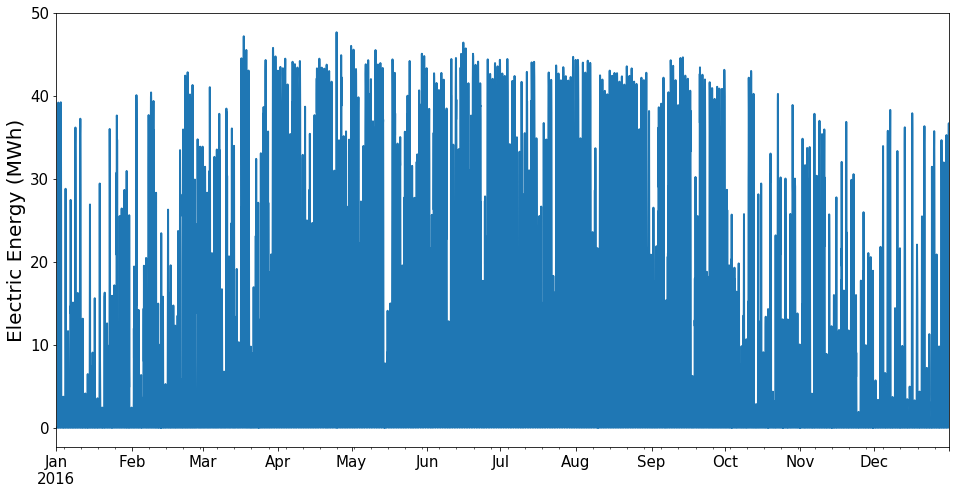

In [10]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant.plot(x='ts', y='Pout', ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

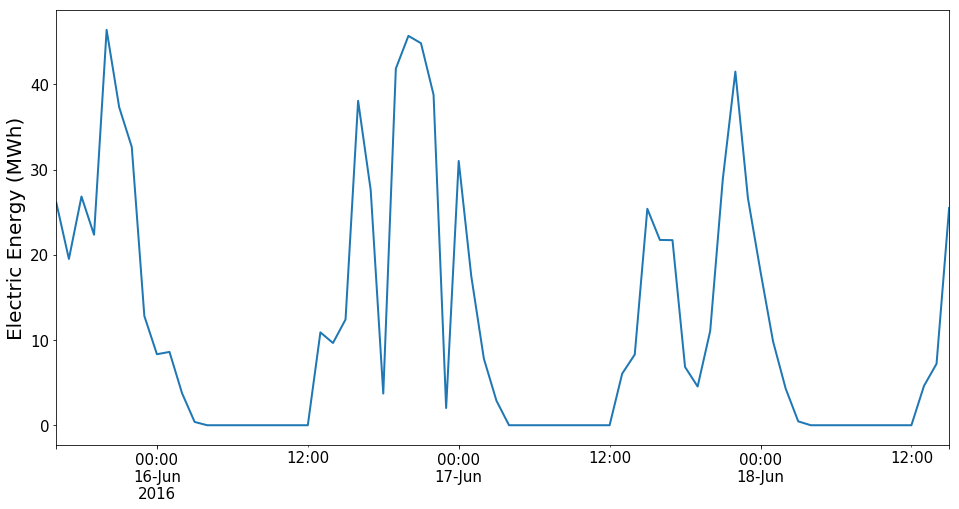

In [11]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant[4000:4072].plot(x='ts', y='Pout', ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

In [12]:
print("Capacity Factor: %.3f" % (data_oneplant['Pout'].sum() / (366 * 24 * solar_plant.loc[id].GenMWMax)))

Capacity Factor: 0.145


## 4. Format Data
Data are formated for REISE

In [13]:
data_reise = helpers.to_reise(data)

In [14]:
data_reise.tail()

,10441,10447,10448,10451,10452,10453,10454,10455,10456,10457,...,13239,13240,13308,13309,13310,13311,13312,13313,13384,13405
UTC,,,,,,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,36.473218,14.409974,10.292839,10.325509,10.325509,10.325509,20.211508,29.855579,20.211508,20.211508,...,0.900014,0.396006,1.131296,4.268755,4.268755,4.268755,4.268755,8.537510,5.157934,5.032531
2016-12-31 20:00:00,36.680856,14.587846,10.419890,10.351279,10.351279,10.351279,20.512213,30.299767,20.512213,20.512213,...,0.717421,0.315665,0.877945,3.312779,3.312779,3.312779,3.312779,6.625559,3.967607,3.785990
2016-12-31 21:00:00,35.061228,14.392225,10.280161,9.963407,9.963407,9.963407,20.072750,29.650610,20.072750,20.072750,...,0.438160,0.192790,0.522293,1.970784,1.970784,1.970784,1.970784,3.941568,2.354322,2.043079
2016-12-31 22:00:00,31.182970,12.834360,9.167400,8.886921,8.886921,8.886921,17.856651,26.377085,17.856651,17.856651,...,0.170057,0.074825,0.171630,0.647618,0.647618,0.647618,0.647618,1.295236,0.740603,0.396981
2016-12-31 23:00:00,23.221280,8.910770,6.364836,6.707359,6.707359,6.707359,12.373044,18.276933,12.373044,12.373044,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
